In [1]:
# A Modified LeNet5 Model on MNIST Dataset #

In [2]:
# Increasing the Cell Width of Jupyter Notebook

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# Library Imports

import torch
import requests
import torchvision
import numpy as np
import pandas as pd
import PIL.ImageOps
import seaborn as sns
from PIL import Image
import torch.nn as nn
from tqdm.auto import tqdm
import torch.nn.functional as F
from torchvision.datasets import MNIST
from sklearn.metrics import confusion_matrix
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Download MNIST Dataset

dataset = MNIST(root='data/', download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 222650289.69it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 39380914.77it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 34918339.47it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3601234.17it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
# Checking Length of the Dataset

len(dataset)

60000

In [6]:
# Dataset Summary

dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [7]:
# Sample Information from the Dataset

dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

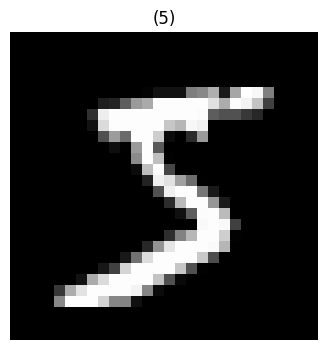

In [8]:
# Plotting an Image from the Dataset

image, label = dataset[0]
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"({label})")
plt.imshow(image, cmap='gray');

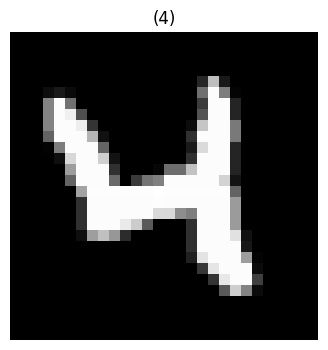

In [9]:
# Plotting an Image from the Dataset

image, label = dataset[20]
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"({label})")
plt.imshow(image, cmap='gray');

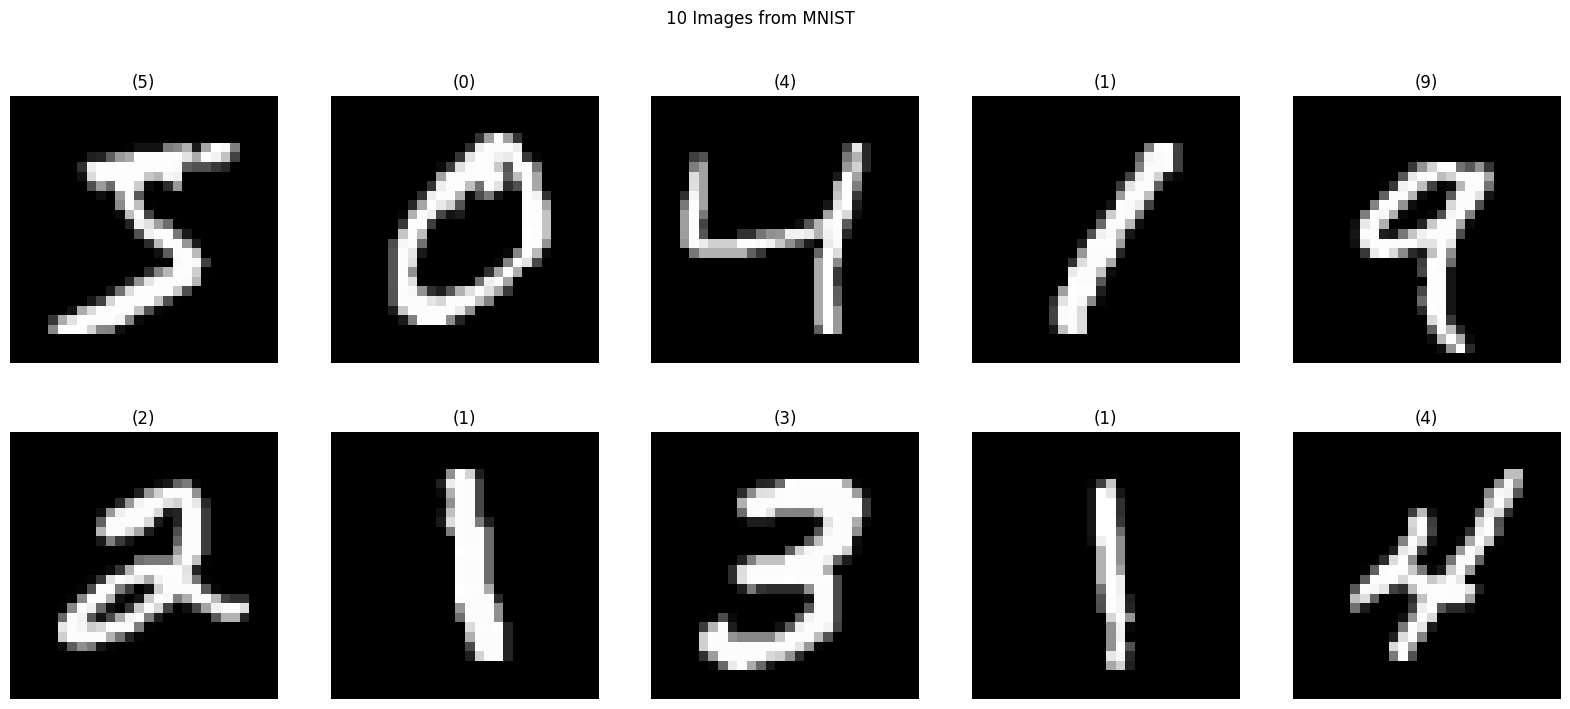

In [10]:
# Plotting Multiple Images from the Dataset

cols = 5
rows = 2

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 4, rows * 4))

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    image, label = dataset[i]
    plt.axis('off')
    plt.title(f"({label})")
    plt.imshow(image, cmap='gray');

plt.suptitle(f"{rows * cols} Images from MNIST")
plt.show()

In [11]:
# Defining Transformation for Datasets and Tensor Image Convertions

transform = transforms.Compose([transforms.Resize((28, 28)),
                                transforms.ToTensor()
                                ])

In [12]:
# Allocating the Training, Validation and Testing Sets from the MNIST Dataset with Tensor Transformations

train_valid = MNIST(root='data/', train=True, transform=transform)

len_valid = 10000
len_train = len(train_valid) - len_valid

train_ds, valid_ds = random_split(train_valid, [50000, 10000])

test_ds = MNIST(root='data/', train=False, transform=transform)

print(f"Length of Training Dataset   : {len(train_ds)}")
print(f"Length of Validation Dataset : {len(valid_ds)}")
print(f"Length of Testing Dataset    : {len(test_ds)}")

Length of Training Dataset   : 50000
Length of Validation Dataset : 10000
Length of Testing Dataset    : 10000


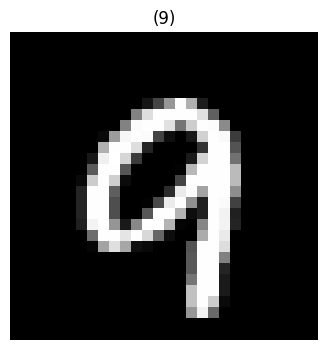

In [13]:
# Plotting a Tensor Image from the Splitted Training Dataset

image, label = train_ds[0]
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"({label})")
plt.imshow(image.permute(1, 2, 0), cmap='gray');

In [14]:
# Showing What permute(1, 2, 0) Does to the Tensor Image

image, label = train_ds[0]
print("image.shape                  :", image.shape)
print("image.permute(1, 2, 0).shape :", image.permute(1, 2, 0).shape)

# It is Also Possible to Squeeze the Tensor Image and Remove the Channel Info
print("image.squeeze().shape       :", image.squeeze().shape)

image.shape                  : torch.Size([1, 28, 28])
image.permute(1, 2, 0).shape : torch.Size([28, 28, 1])
image.squeeze().shape       : torch.Size([28, 28])


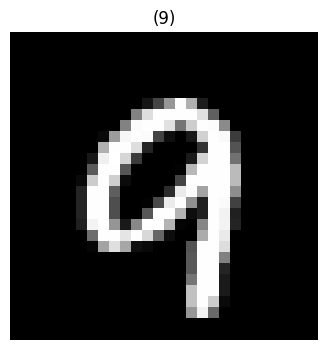

In [15]:
# Plotting a Squeezed Tensor Image from the Splitted Training Dataset

image, label = train_ds[0]
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"({label})")
plt.imshow(image.squeeze(), cmap='gray');

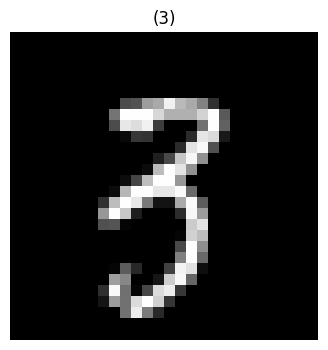

In [16]:
# Plotting a Tensor Image from the Splitted Validation Dataset

image, label = valid_ds[0]
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"({label})")
plt.imshow(image.permute(1, 2, 0), cmap='gray');

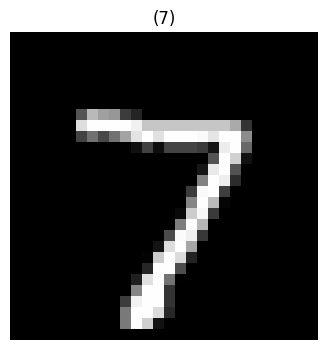

In [17]:
# Plotting a Tensor Image from the Splitted Testing Dataset

image, label = test_ds[0]
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"({label})")
plt.imshow(image.permute(1, 2, 0), cmap='gray');

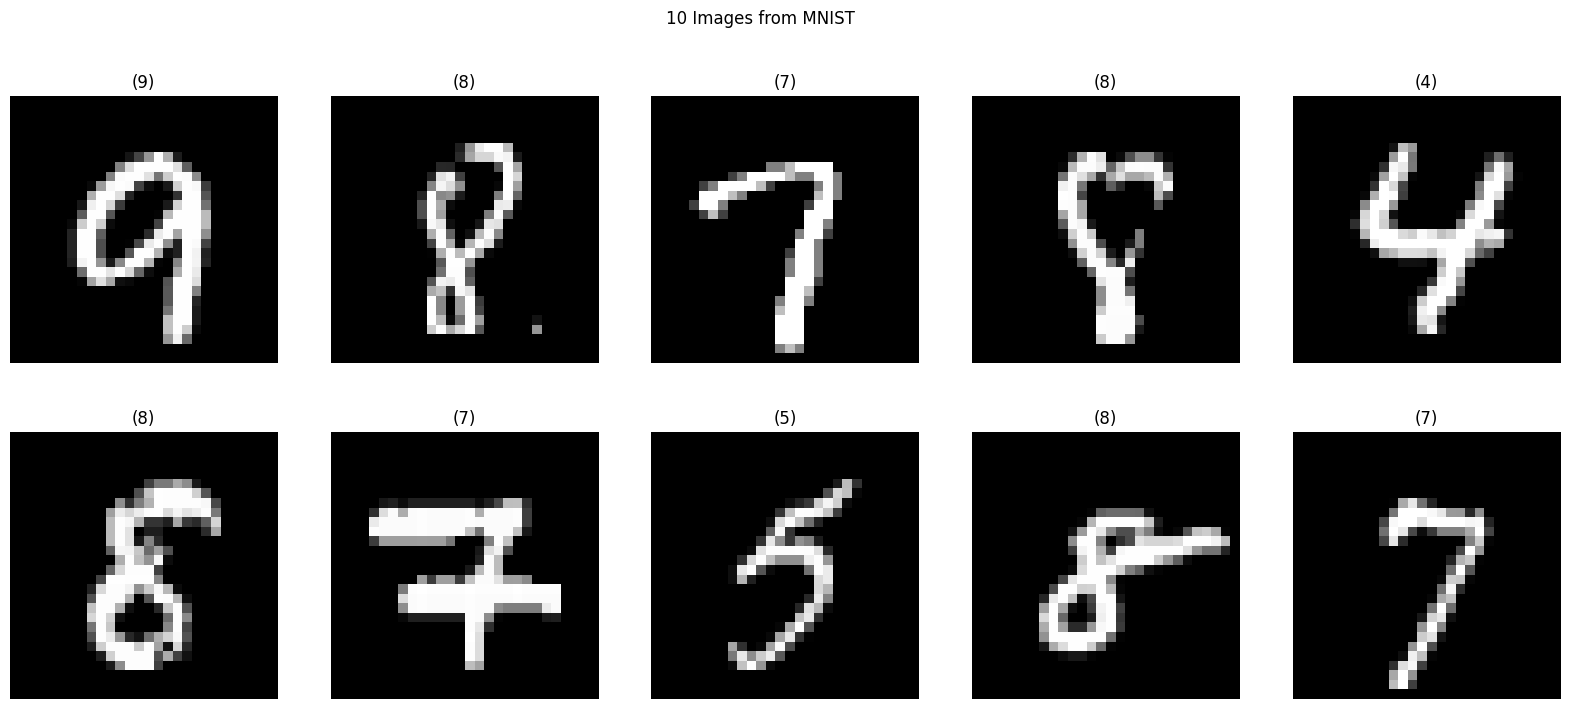

In [18]:
# Plotting Multiple Tensor Images from the Splitted Datasets

cols = 5
rows = 2

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 4, rows * 4))

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    image, label = train_ds[i]
    # image_tensor, label_tensor = test_ds[i]
    plt.axis('off')
    plt.title(f"({label})")
    plt.imshow(image.permute(1, 2, 0), cmap='gray');

plt.suptitle(f"{rows * cols} Images from MNIST")
plt.show()

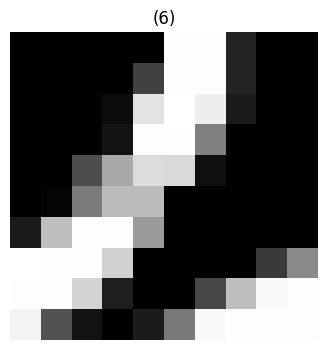

In [19]:
# Plotting a Specific Region of a Tensor Image from the Splitted Datasets

image, label = valid_ds[10]
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"({label})")
plt.imshow(image[0, 5:15, 10:20], cmap='gray');

In [20]:
# Definition of Data Loaders from the Tensor Datasets to Load the Data in Batches

batch_size = 128

train_dl = DataLoader(train_ds, batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size)
test_dl = DataLoader(test_ds, batch_size)

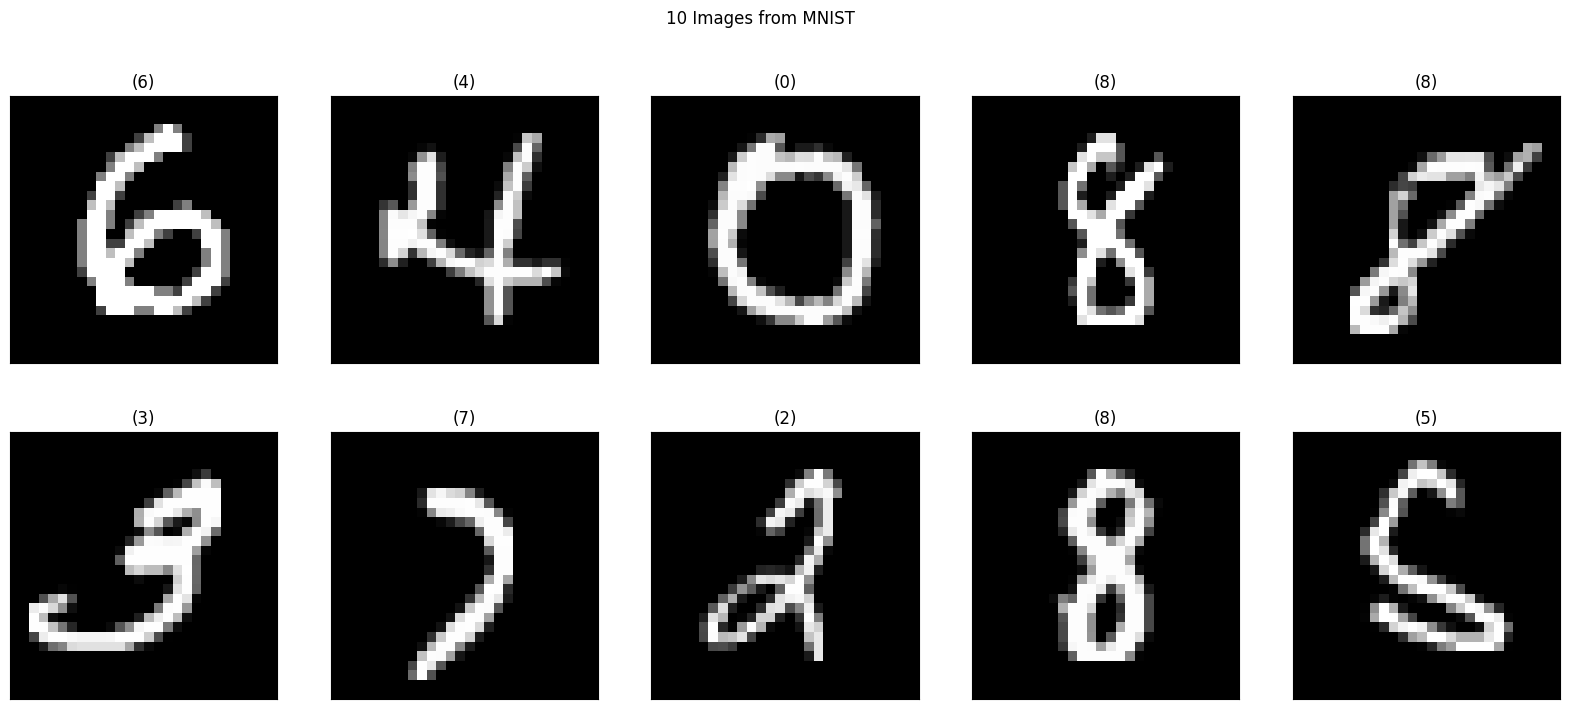

In [21]:
# Getting Tensor Images from Data Loaders

dataiter = iter(train_dl)
images, labels = next(dataiter)

cols = 5
rows = 2

fig = plt.figure(figsize=(cols * 4, rows * 4))

for idx in np.arange(rows * cols):
    ax = fig.add_subplot(rows, cols, idx+1, xticks=[], yticks=[])
    plt.imshow(images[idx].permute(1, 2, 0), cmap='gray')
    ax.set_title(f"({labels[idx].item()})")

plt.suptitle(f"{rows * cols} Images from MNIST")
plt.show()

In [22]:
# Simple LeNet5 Class to Define a Modified LeNet5 Model

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5, 1)
        self.conv2 = nn.Conv2d(32, 64, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 64, 768)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(768, 400)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(400, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 64)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

In [23]:
# Creating the Model

model = LeNet5()
print(model)

LeNet5(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=768, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=768, out_features=400, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=400, out_features=10, bias=True)
)


In [24]:
# Checking If the Model is Sent to the Device

next(model.parameters()).is_cuda

False

In [25]:
# Showing the Shape of Inputs and Outputs of the Model, Printing A Group of Labels from the Dataset

for images, labels in train_dl:

    print(f"Shape of Inputs:\n{images.shape}\n")
    outputs = model(images)
    print(f"Shape of Outputs:\n{outputs.shape}\n")

    print(f"Labels:\n{labels}")

    break

Shape of Inputs:
torch.Size([128, 1, 28, 28])

Shape of Outputs:
torch.Size([128, 10])

Labels:
tensor([4, 4, 4, 7, 3, 3, 6, 3, 5, 3, 8, 5, 0, 8, 2, 8, 8, 7, 8, 3, 0, 9, 8, 5,
        4, 1, 1, 7, 8, 2, 8, 2, 1, 1, 1, 5, 3, 9, 6, 2, 1, 3, 8, 2, 3, 4, 8, 0,
        3, 2, 1, 1, 6, 3, 7, 0, 2, 5, 8, 6, 5, 4, 1, 4, 2, 4, 5, 6, 5, 4, 8, 7,
        7, 6, 0, 1, 2, 7, 9, 3, 6, 7, 1, 4, 6, 5, 4, 2, 1, 5, 1, 1, 1, 0, 9, 2,
        0, 1, 3, 5, 5, 2, 7, 2, 2, 4, 9, 1, 1, 5, 3, 9, 6, 4, 2, 2, 4, 2, 7, 2,
        2, 7, 3, 6, 4, 0, 4, 5])


In [26]:
# The First Element from the First Batch (128) of the Output Data with 10 Probability Values (Outputs)

outputs[0]

tensor([-0.0598,  0.0063, -0.0177,  0.0490, -0.0219, -0.0316, -0.0415, -0.0171,
        -0.0252,  0.0246], grad_fn=<SelectBackward0>)

In [27]:
# All the Elements of outputs[0] can Be Made Positive

exps = torch.exp(outputs[0])
print(exps)

tensor([0.9420, 1.0063, 0.9824, 1.0502, 0.9783, 0.9689, 0.9593, 0.9830, 0.9751,
        1.0249], grad_fn=<ExpBackward0>)


In [28]:
# Making All the Positive Elements Between 0 and 1

probs = exps / torch.sum(exps)
print(f"Probabilities:\n{probs}\n")

print(f"Sum of Probabilities: {torch.sum(probs)}")

Probabilities:
tensor([0.0954, 0.1020, 0.0995, 0.1064, 0.0991, 0.0982, 0.0972, 0.0996, 0.0988,
        0.1038], grad_fn=<DivBackward0>)

Sum of Probabilities: 0.9999999403953552


In [29]:
# Applying Softmax() Function on Each Output Row to Make All the Row Elements Between 0 and 1
probs = nn.Softmax(dim=1)(outputs)

# Looking at the Sample Probabilities
print(f"Sample Probabilities:\n{probs[:2].data}\n")  # Show the First Two Output Lists

# Adding up All the Probabilities in an Output Row
print(f"Sum of probs[0]  : {torch.sum(probs[0]).item()}")
print(f"Sum of probs[1]  : {torch.sum(probs[1]).item()}")
print(f"Sum of probs[2]  : {torch.sum(probs[2]).item()}")
print(". . .")
print(f"Sum of probs[{batch_size-1}]: {torch.sum(probs[batch_size-1]).item()}")

Sample Probabilities:
tensor([[0.0954, 0.1020, 0.0995, 0.1064, 0.0991, 0.0982, 0.0972, 0.0996, 0.0988,
         0.1038],
        [0.0948, 0.1049, 0.1068, 0.1100, 0.0958, 0.0977, 0.0985, 0.0951, 0.0964,
         0.0999]])

Sum of probs[0]  : 0.9999998807907104
Sum of probs[1]  : 0.9999998807907104
Sum of probs[2]  : 1.0
. . .
Sum of probs[127]: 1.0


In [30]:
# Printing the Max Probabilities, Predictions and Labels

max_probs, preds = torch.max(probs, dim=1)

print(f"Max Probabilities:\n{max_probs}\n")
print(f"Predictions:\n{preds}\n")
print(f"Labels:\n{labels}\n")
print(f"Differences:\n{preds-labels}")

Max Probabilities:
tensor([0.1064, 0.1100, 0.1088, 0.1065, 0.1074, 0.1084, 0.1118, 0.1070, 0.1067,
        0.1093, 0.1088, 0.1036, 0.1101, 0.1121, 0.1083, 0.1072, 0.1114, 0.1092,
        0.1062, 0.1099, 0.1082, 0.1080, 0.1099, 0.1059, 0.1075, 0.1076, 0.1055,
        0.1137, 0.1130, 0.1085, 0.1051, 0.1088, 0.1077, 0.1068, 0.1114, 0.1053,
        0.1126, 0.1089, 0.1083, 0.1062, 0.1091, 0.1108, 0.1046, 0.1099, 0.1093,
        0.1082, 0.1120, 0.1099, 0.1090, 0.1089, 0.1075, 0.1078, 0.1058, 0.1057,
        0.1083, 0.1082, 0.1101, 0.1089, 0.1080, 0.1066, 0.1099, 0.1062, 0.1095,
        0.1048, 0.1041, 0.1070, 0.1103, 0.1089, 0.1084, 0.1074, 0.1097, 0.1095,
        0.1095, 0.1142, 0.1073, 0.1062, 0.1080, 0.1125, 0.1072, 0.1090, 0.1099,
        0.1073, 0.1069, 0.1064, 0.1077, 0.1078, 0.1107, 0.1067, 0.1058, 0.1103,
        0.1070, 0.1055, 0.1076, 0.1094, 0.1126, 0.1084, 0.1108, 0.1091, 0.1059,
        0.1071, 0.1103, 0.1124, 0.1110, 0.1083, 0.1076, 0.1097, 0.1090, 0.1070,
        0.1057, 0.113

In [31]:
# When the Model Predicts Well, Most of the Elements in the "Differences" Tensor will be 0

In [32]:
# Simple Accuracy Calculation

print(f"True Predictions in the First Batch    : {torch.sum(preds == labels).item()}")
print(f"All the Predictions in the First Batch : {len(preds)}")
print(f"Probability of the True Predictions    : {torch.sum(preds == labels).item() / len(preds)}")

True Predictions in the First Batch    : 20
All the Predictions in the First Batch : 128
Probability of the True Predictions    : 0.15625


In [33]:
##############################################
### Defining Necessary Functions for MNIST ###
##############################################

In [34]:
# Definition of accuracy() Function

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [35]:
# Definition of a Modified LeNet5 Model in the Class with All the Necessary Functions

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5, 1)
        self.conv2 = nn.Conv2d(32, 64, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 64, 768)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(768, 400)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(400, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 64)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate Predictions
        loss = F.cross_entropy(out, labels)   # Evaluate Loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate Predictions
        loss = F.cross_entropy(out, labels)   # Evaluate Loss
        acc = accuracy(out, labels)           # Evaluate Accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, epochs, result):
        print("Epoch [{}/{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch+1, epochs, result['val_loss'], result['val_acc']))

In [36]:
# Functions to Train and Test the Model

def evaluate(model, valid_dl):
    """Evaluate the Model's Performance on the Validation Set"""
    outputs = [model.validation_step(batch) for batch in tqdm(valid_dl, desc="Evaluation")]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_dl, valid_dl, opt_func=torch.optim.SGD):
    """Train the Model Using Gradient Descent"""
    optimizer = opt_func(model.parameters(), lr)
    history = []  # For Recording Epoch-Wise Results

    for epoch in range(epochs):

        # Training Phase
        model.train()
        for batch in tqdm(train_dl, desc=f"Epoch [{epoch+1}/{epochs}]"):
            optimizer.zero_grad()
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()

        # Validation phase
        model.eval()
        with torch.no_grad():
            result = evaluate(model, valid_dl)
            model.epoch_end(epoch, epochs, result)
            history.append(result)

    return history

In [37]:
# Definition of Device Loader Functions to Send Data Loaders to the Current Device (GPU) Before Training

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def to_device(data, device):
    # Move Tensor(s) to Chosen Device
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


class DeviceDataLoader():
    # Wrap a Dataloader to Move Data to a Device
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        # Yield a Batch of Data After Moving it to Device
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        # Number of Batches
        return len(self.dl)

In [38]:
# Testing the "to_device()" Function

for images, labels in train_dl:
    print(f"images.shape: {images.shape}")
    print(f"{batch_size} images are Currently at: {images.device}")
    images = to_device(images, device)
    print(f"\n{batch_size} images are Sent to: {images.device}")
    break

images.shape: torch.Size([128, 1, 28, 28])
128 images are Currently at: cpu

128 images are Sent to: cuda:0


In [39]:
# Creating the Model and Sending It to the Device

model = LeNet5()
model = to_device(model, device)
print(model, end="\n\n")
if next(model.parameters()).is_cuda:
    print("# Model is on CUDA #")

LeNet5(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=768, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=768, out_features=400, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=400, out_features=10, bias=True)
)

# Model is on CUDA #


In [40]:
# Sending Dataset Loaders to the Current Device

train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

In [41]:
# Checking the Current Device of the Validation Data Loader

for images, labels in valid_dl:
    print(f"images.device: {images.device}")
    print(f"labels.device: {labels.device}")
    break

images.device: cuda:0
labels.device: cuda:0


In [42]:
# Evaluation of the Model Before Training

model.eval()
with torch.no_grad():
    result = evaluate(model, valid_dl)
print(result)

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

{'val_loss': 2.303058624267578, 'val_acc': 0.1073971539735794}


In [43]:
# Training the Model with 0.1 Learning Rate for 20 Epochs

history = fit(20, 0.1, model, train_dl, valid_dl)

Epoch [1/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [1/20], val_loss: 0.1421, val_acc: 0.9543


Epoch [2/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [2/20], val_loss: 0.0865, val_acc: 0.9727


Epoch [3/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [3/20], val_loss: 0.0651, val_acc: 0.9785


Epoch [4/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [4/20], val_loss: 0.0579, val_acc: 0.9815


Epoch [5/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [5/20], val_loss: 0.0558, val_acc: 0.9830


Epoch [6/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [6/20], val_loss: 0.0489, val_acc: 0.9852


Epoch [7/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [7/20], val_loss: 0.0417, val_acc: 0.9873


Epoch [8/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [8/20], val_loss: 0.0364, val_acc: 0.9892


Epoch [9/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [9/20], val_loss: 0.0363, val_acc: 0.9896


Epoch [10/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [10/20], val_loss: 0.0338, val_acc: 0.9899


Epoch [11/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [11/20], val_loss: 0.0347, val_acc: 0.9902


Epoch [12/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [12/20], val_loss: 0.0341, val_acc: 0.9904


Epoch [13/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [13/20], val_loss: 0.0316, val_acc: 0.9908


Epoch [14/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [14/20], val_loss: 0.0326, val_acc: 0.9913


Epoch [15/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [15/20], val_loss: 0.0310, val_acc: 0.9921


Epoch [16/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [16/20], val_loss: 0.0362, val_acc: 0.9890


Epoch [17/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [17/20], val_loss: 0.0315, val_acc: 0.9918


Epoch [18/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [18/20], val_loss: 0.0341, val_acc: 0.9915


Epoch [19/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [19/20], val_loss: 0.0301, val_acc: 0.9920


Epoch [20/20]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [20/20], val_loss: 0.0311, val_acc: 0.9920


In [44]:
# Training the Model with 0.05 Learning Rate for 10 Epochs

history += fit(10, 0.05, model, train_dl, valid_dl)

Epoch [1/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [1/10], val_loss: 0.0330, val_acc: 0.9914


Epoch [2/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [2/10], val_loss: 0.0297, val_acc: 0.9927


Epoch [3/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [3/10], val_loss: 0.0309, val_acc: 0.9922


Epoch [4/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [4/10], val_loss: 0.0294, val_acc: 0.9920


Epoch [5/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [5/10], val_loss: 0.0302, val_acc: 0.9932


Epoch [6/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [6/10], val_loss: 0.0307, val_acc: 0.9934


Epoch [7/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [7/10], val_loss: 0.0326, val_acc: 0.9925


Epoch [8/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [8/10], val_loss: 0.0322, val_acc: 0.9925


Epoch [9/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [9/10], val_loss: 0.0312, val_acc: 0.9926


Epoch [10/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [10/10], val_loss: 0.0314, val_acc: 0.9927


In [45]:
# Training the Model with 0.01 Learning Rate for 10 Epochs

history += fit(10, 0.01, model, train_dl, valid_dl)

Epoch [1/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [1/10], val_loss: 0.0311, val_acc: 0.9930


Epoch [2/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [2/10], val_loss: 0.0311, val_acc: 0.9925


Epoch [3/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [3/10], val_loss: 0.0310, val_acc: 0.9930


Epoch [4/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [4/10], val_loss: 0.0319, val_acc: 0.9932


Epoch [5/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [5/10], val_loss: 0.0317, val_acc: 0.9929


Epoch [6/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [6/10], val_loss: 0.0319, val_acc: 0.9930


Epoch [7/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [7/10], val_loss: 0.0320, val_acc: 0.9931


Epoch [8/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [8/10], val_loss: 0.0319, val_acc: 0.9930


Epoch [9/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [9/10], val_loss: 0.0319, val_acc: 0.9927


Epoch [10/10]:   0%|          | 0/391 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [10/10], val_loss: 0.0319, val_acc: 0.9927


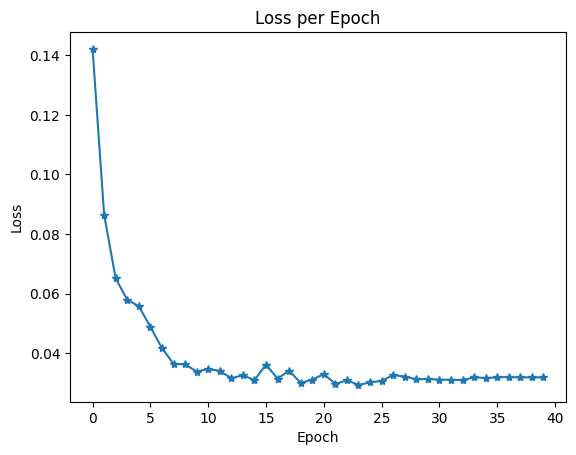

In [46]:
# Plotting Loss Values per Epoch

losses = [result['val_loss'] for result in history]
plt.plot(losses, '-*')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch');

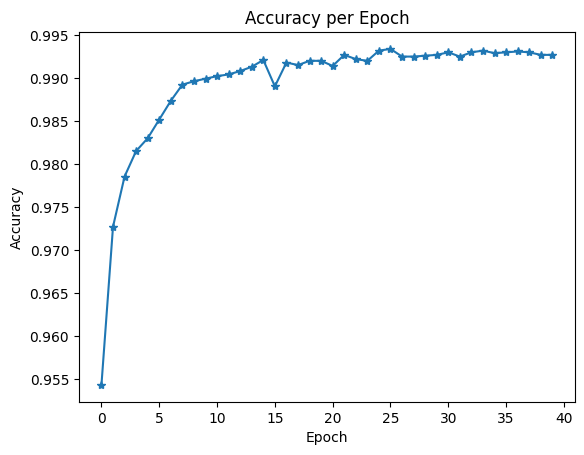

In [47]:
# Plotting Accuracy Values per Epoch

accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-*')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch');

In [48]:
# The Final Loss & Accuracy Element of the "history" List Belongs to the Latest State of the Model for Validation Dataset

history[-1]

{'val_loss': 0.03185601532459259, 'val_acc': 0.9926819801330566}

In [49]:
# Re-Evaluating the Trained Model with Testing Dataset

model.eval()
with torch.no_grad():
    result = evaluate(model, test_dl)
print(result)

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

{'val_loss': 0.02463441900908947, 'val_acc': 0.9930775165557861}


In [50]:
# Label Prediction Function for the Tensor Images

def predict_image(img, model):
    model.eval()
    with torch.no_grad():
        image = img.unsqueeze(0)
        preds = model(image)
        _, max_preds = torch.max(preds, 1)
    return max_preds[0].item()

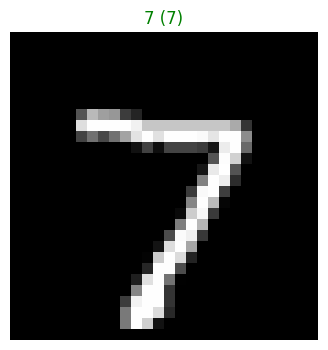

In [51]:
# Plotting a Tensor Image from the "test_ds" Dataset

image, label = test_ds[0]
image = to_device(image, device)
pred = predict_image(image, model)
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"{pred} ({label})", color=("green" if pred==label else "red"))
plt.imshow(image.cpu().permute(1, 2, 0), cmap='gray');

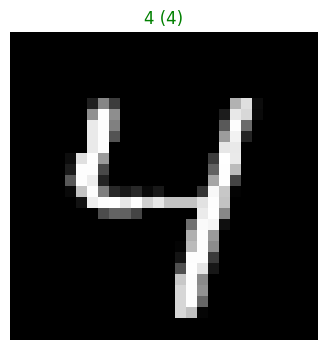

In [52]:
# Plotting a Tensor Image from the "test_ds" Dataset

image, label = test_ds[210]
image = to_device(image, device)
pred = predict_image(image, model)
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"{pred} ({label})", color=("green" if pred==label else "red"))
plt.imshow(image.cpu().permute(1, 2, 0), cmap='gray');

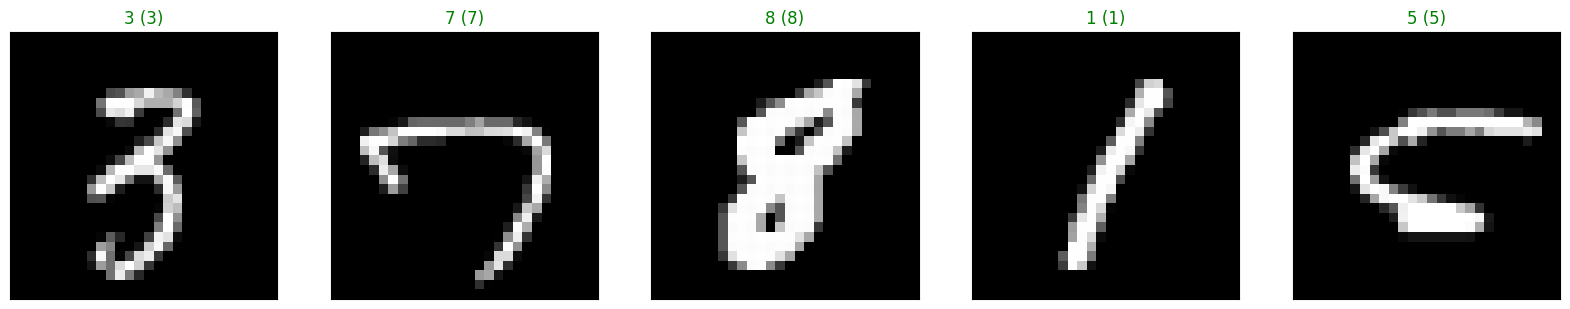

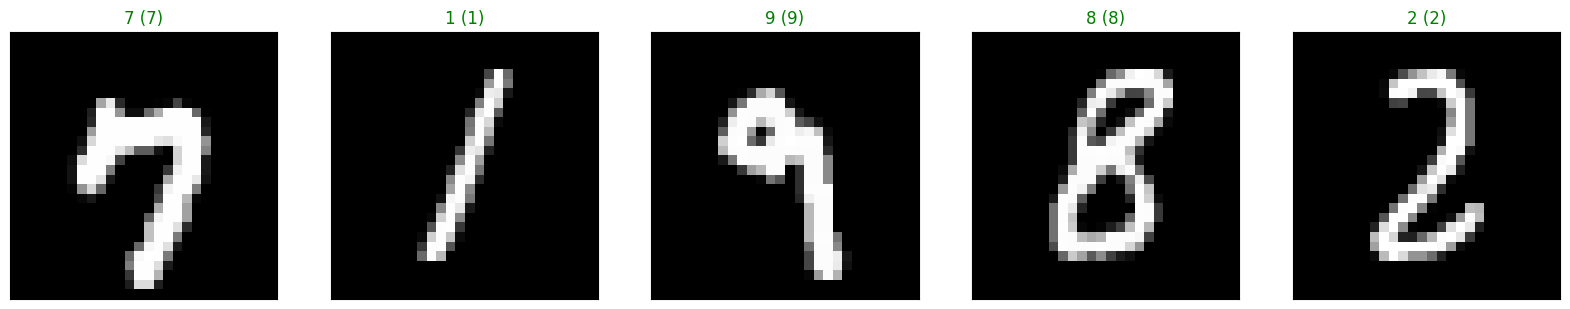

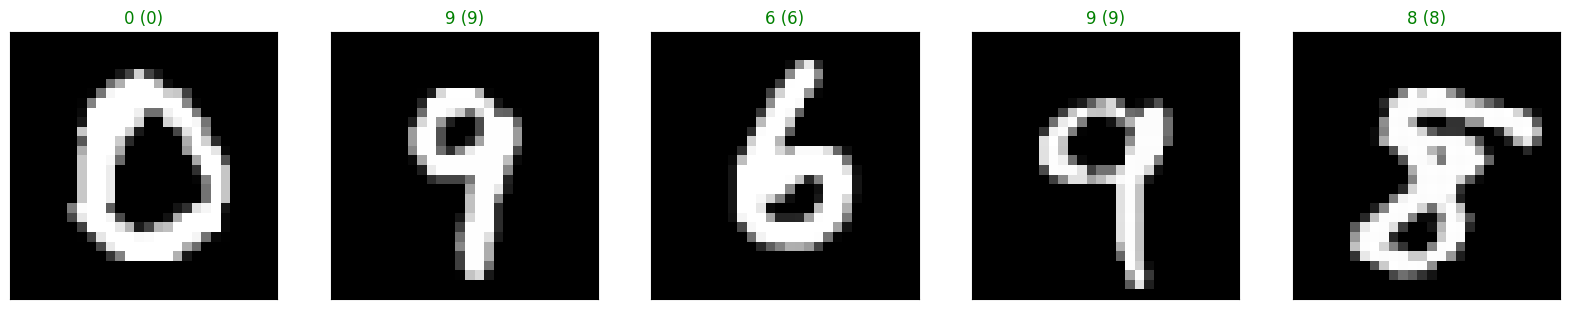

In [53]:
# Getting Images & Labels from One Batch
#dataiter = iter(valid_loader)
#images, labels = next(dataiter)

i = 0
# Getting Images & Labels from Different Batches
for images, labels in valid_dl:

    output = model(images)
    _, preds = torch.max(output, 1)

    col = 5
    row = 1     # Get 1 Row from Each Batch

    fig = plt.figure(figsize=(col * 4, row * 4))

    for idx in np.arange(row * col):
        ax = fig.add_subplot(row, col, idx+1, xticks=[], yticks=[])
        plt.imshow(images[idx].cpu().permute(1, 2, 0), cmap='gray')
        ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))

    i += 1
    if i == 3:
        break   # Get 1 Row From 3 Different Batches

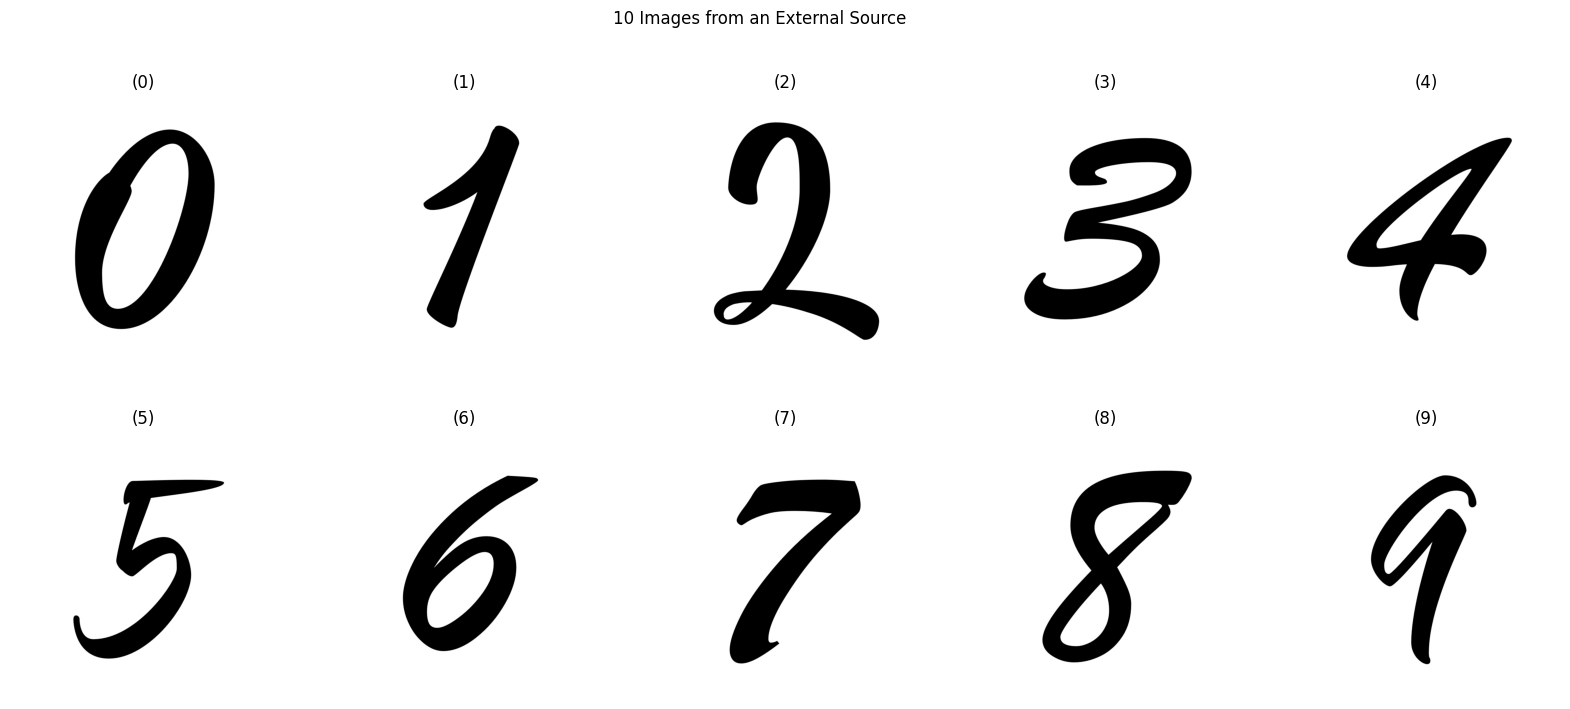

In [54]:
# Getting Real Number Images from an External Source to Transfrom Them into Handwritten-Like Numbers and Predict Their Label Values

'''
url = []
# Comment out Here If the Images will Be Directly Loaded from Local Files
url.append("url_of_number_0_image")  # (0)
url.append("url_of_number_1_image")  # (1)
url.append("url_of_number_2_image")  # (2)
url.append("url_of_number_3_image")  # (3)
url.append("url_of_number_4_image")  # (4)
url.append("url_of_number_5_image")  # (5)
url.append("url_of_number_6_image")  # (6)
url.append("url_of_number_7_image")  # (7)
url.append("url_of_number_8_image")  # (8)
url.append("url_of_number_9_image")  # (9)
'''

img_ = []
lbl = []

# Comment out This Loop If the Images will Be Directly Loaded from Local Files
'''
for i, link in enumerate(url):
    response = requests.get(link, stream=True)
    img_.append(Image.open(response.raw))
    lbl.append(i)
'''

# # Use This Loop If the Images will Be Directly Loaded from Local Files
for i in range(0, 10):
    img_.append(Image.open(f"./ExternalNumbers/{i}.jpg"))
    lbl.append(i)

cols = 5
rows = 2

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 4, rows * 4))

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.axis('off')
    plt.title(f"({lbl[i]})")
    plt.imshow(img_[i], cmap='gray');

plt.suptitle(f"{rows * cols} Images from an External Source")
plt.show()

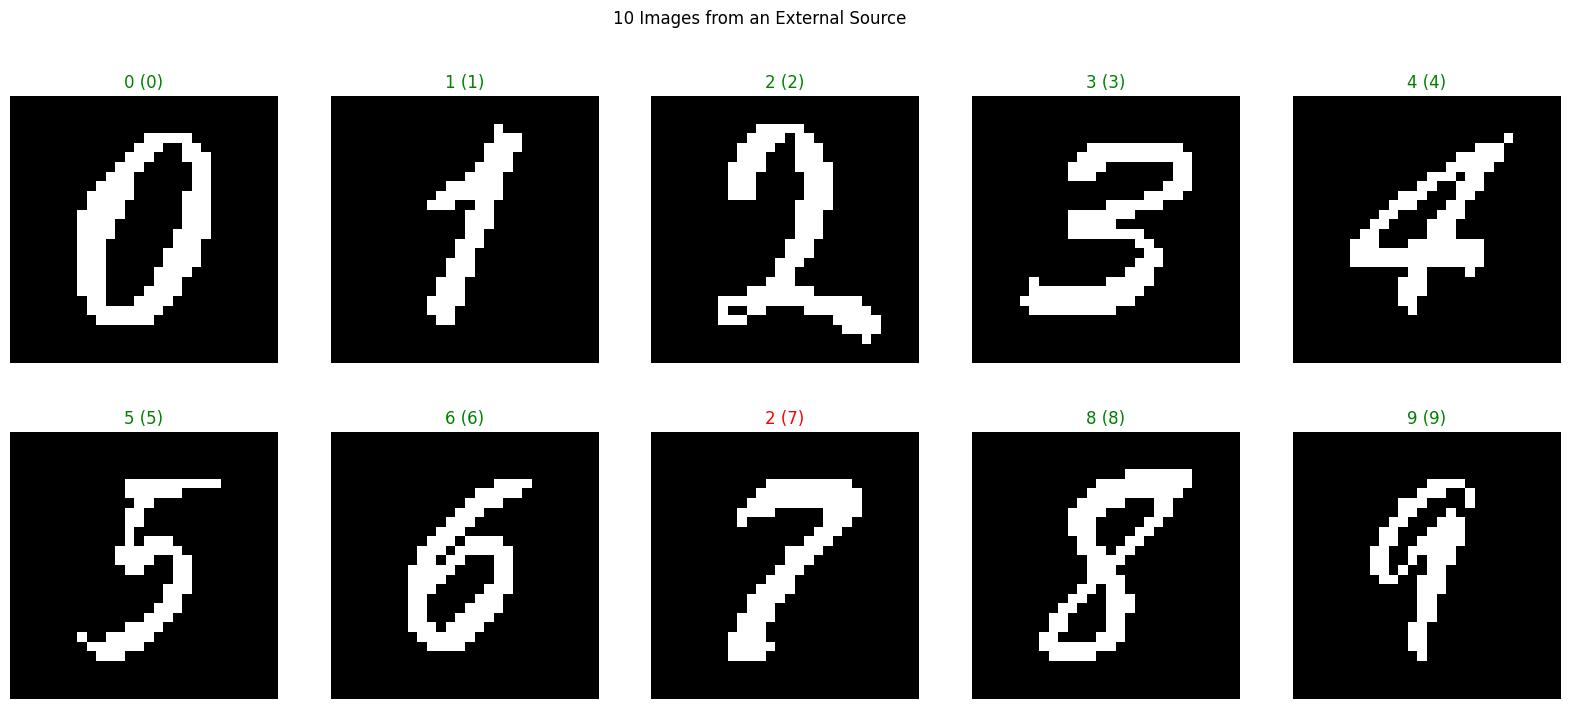

In [55]:
# Transforming the External-Source Numbers and Predicting Their Labels

prd = []
img = []
for im_ in img_:
    image = PIL.ImageOps.invert(im_)  # Invertion (i.e. Making White Black and Vice Versa)
    image = image.convert('1')        # Convert from RGB to Gray
    image = transform(image)          # Apply the Transform Function Defined Earlier to Make the External Images the Same as the Training Data
    img.append(image)
    image = to_device(image, device)
    prd.append(predict_image(image, model))

cols = 5
rows = 2

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 4, rows * 4))

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.axis('off')
    plt.title(f"{prd[i]} ({lbl[i]})", color=("green" if prd[i]==lbl[i] else "red"))
    plt.imshow(img[i].permute(1, 2, 0), cmap='gray');

plt.suptitle(f"{rows * cols} Images from an External Source")
plt.show()

Making Predictions:   0%|          | 0/79 [00:00<?, ?it/s]

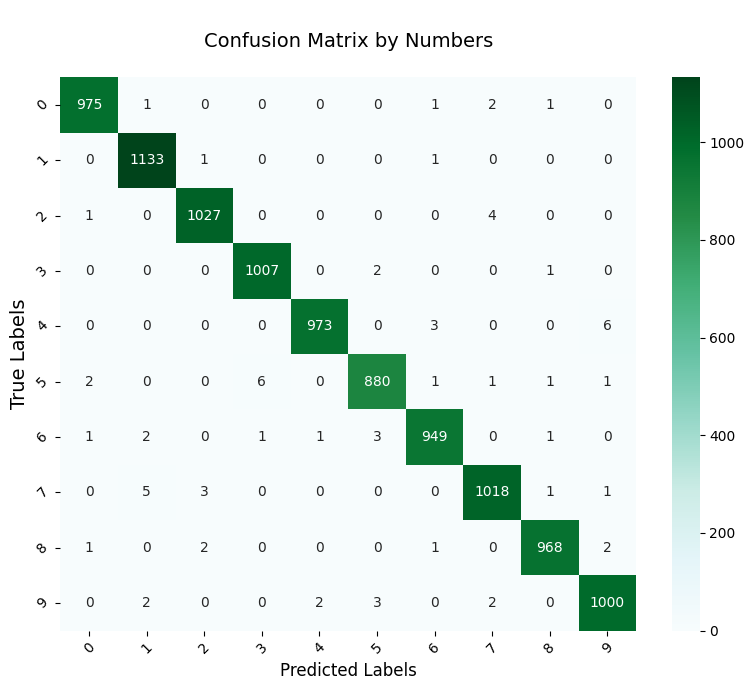

In [56]:
# Confusion Matrix by Numbers

y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in tqdm(test_dl, desc="Making Predictions"):
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculating Confusion Matrix
cf_matrix = confusion_matrix(y_true, y_pred)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

df_cm = pd.DataFrame(cf_matrix, class_names, class_names)

plt.figure(figsize=(8, 7))
sns.heatmap(df_cm, annot=True, cmap="BuGn", fmt='g')
plt.title("\nConfusion Matrix by Numbers\n", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Making Predictions:   0%|          | 0/79 [00:00<?, ?it/s]

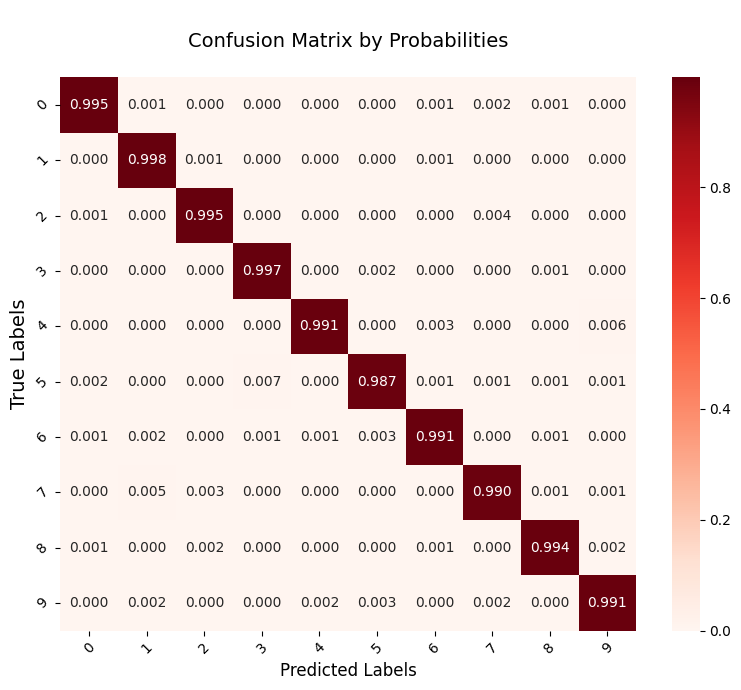

In [57]:
# Confusion Matrix by Probabilities

y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in tqdm(test_dl, desc="Making Predictions"):
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculating Confusion Matrix
cf_matrix = confusion_matrix(y_true, y_pred)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], class_names, class_names)

plt.figure(figsize=(8, 7))
sns.heatmap(df_cm, annot=True, cmap='Reds', fmt=".3f")
plt.title("\nConfusion Matrix by Probabilities\n", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
# Using the Trained Model for Batch Loading from test_dl

model.eval()
with torch.no_grad():
    for images, labels in test_dl:
        outputs = model(images)
        break

print(f"Sample Outputs:\n{outputs[:1].data}")

Sample Outputs:
tensor([[ -5.2425,   1.2837,  -1.3738,   0.8347,   1.1692,  -3.7329, -13.9331,
          22.1676,  -4.0293,   2.9699]], device='cuda:0')


In [59]:
# Applying Softmax() Function for Each Output Row
probs = nn.Softmax(dim=1)(outputs)
#probs = F.softmax(outputs, dim=1)

# Looking at Sample Probabilities
print("Sample Probabilities:\n", probs[:1].data)

# Adding up the Probabilities of an Output Row
print("\nSum of probs[0]:", torch.sum(probs[:1]).item())

Sample Probabilities:
 tensor([[1.2473e-12, 8.5159e-10, 5.9717e-11, 5.4356e-10, 7.5947e-10, 5.6438e-12,
         2.0973e-16, 1.0000e+00, 4.1960e-12, 4.5976e-09]], device='cuda:0')

Sum of probs[0]: 1.0


In [60]:
# Analysis of Truth Labels & Predicted Labels

max_probs, preds = torch.max(probs, dim=1)
print(f"Labels:\n{labels}\n")
print(f"Predictions:\n{preds}\n")
print(f"Differences:\n{preds-labels}\n")
print(f"Max Probabilities:\n{max_probs}")

Labels:
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5], device='cuda:0')

Predictions:
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5], device='cuda:0')

Differences:
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [61]:
# Most of the Elements in the "Differences" Tensor are Zero (0)

In [62]:
# Simple Accuracy Calculation

print(f"True Predictions in the First Batch    : {torch.sum(preds == labels).item()}")
print(f"All the Predictions in the First Batch : {len(preds)}")
print(f"Probability of the True Predictions    : {torch.sum(preds == labels).item() / len(preds)}")

True Predictions in the First Batch    : 127
All the Predictions in the First Batch : 128
Probability of the True Predictions    : 0.9921875


In [63]:
# Saving the Trained Model.

torch.save(model.state_dict(), 'cnn_mnist.pth')

In [64]:
# Creating a New Model to Load the Saved Weights.

model_new = LeNet5()
model_new = to_device(model_new, device)
if next(model_new.parameters()).is_cuda:
    print("Model is at CUDA")

Model is at CUDA


In [65]:
# Evaluating the New Model

model_new.eval()
with torch.no_grad():
    result_new = evaluate(model_new, test_dl)
print(result_new)

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

{'val_loss': 2.305504560470581, 'val_acc': 0.10126582533121109}


In [66]:
# Loading the Saved Weights to the New Model

model_new.load_state_dict(torch.load('cnn_mnist.pth'))

<All keys matched successfully>

In [67]:
# The Result of Evaluation from the Saved Model

model_new.eval()
with torch.no_grad():
    result_new = evaluate(model_new, test_dl)
print(result_new)

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

{'val_loss': 0.02463441900908947, 'val_acc': 0.9930775165557861}


In [68]:
# Re-Evaluating the Trained Original Model with the Testing Set

model.eval()
with torch.no_grad():
    result = evaluate(model, test_dl)
print(result)

Evaluation:   0%|          | 0/79 [00:00<?, ?it/s]

{'val_loss': 0.02463441900908947, 'val_acc': 0.9930775165557861}


In [69]:
# Removing the "data" Folder, "ExternalNumbers" Folder and the "cnn_mnist.pth" File (Optional)

import os, shutil

def remove_path(path):
    if os.path.isdir(path):
        shutil.rmtree(path)
    elif os.path.isfile(path):
        os.remove(path)

remove_path("data")
remove_path("ExternalNumbers")
remove_path("cnn_mnist.pth")

In [70]:
# Terminating the Session (for Colab Runtime)

from google.colab import runtime
runtime.unassign()